Documentation of Decision Trees [Click Here](https://docs.google.com/document/d/1sVouUJvH8sl64Jw5CijJGKtpY3CEcWKMXTE9Dfrc2sE/edit)

Documentation of Session [Click Here](https://docs.google.com/document/d/1TOr5eifhDDeqtizzpk4qDPC9D9LjOwxFOZPbcIBBAEU/edit)

OF&UF [Click Here](https://docs.google.com/document/d/1JsHr8g0RXfQGNmHXsDyxMSRXXBjXZ6Dy_8fPTVeP__0/edit)  overfitting and underfitting

**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv')
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
data.shape

(81, 4)

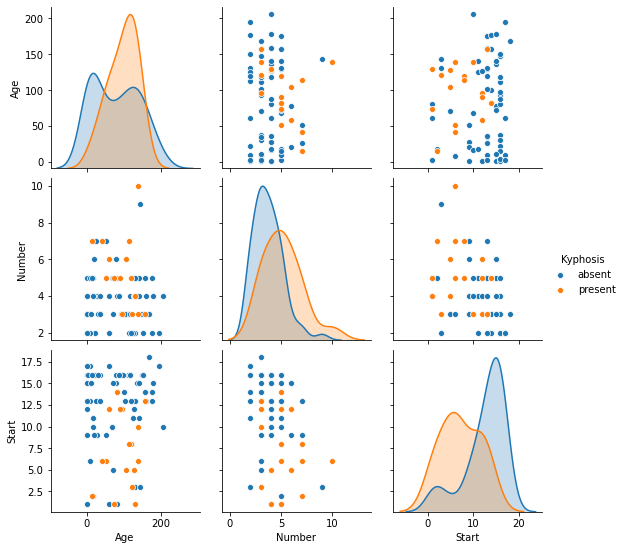

In [5]:
sns.pairplot(data,hue='Kyphosis')

In [6]:
#Splitting the data set into i/p and o/p
X=data.iloc[:,1:]
X=data.drop('Kyphosis',axis=1)
y=data.Kyphosis

In [9]:
#Train_test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [10]:
#train-test split
#Apply decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
#initialization of object
dtree = DecisionTreeClassifier(criterion = 'entropy')
#applying the classifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
#Predict om training data
y_train_pred = dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [12]:
#Classification report on training data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [13]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [14]:
#Prediction on test data(unseen data)
#Syntax: objectname.predict(inputvalues)
y_test_pred = dtree.predict(X_test)
#corressponding o/p of X_test is stored in y_test
#Compare the actual y_test values with model predicted y_test_pred
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



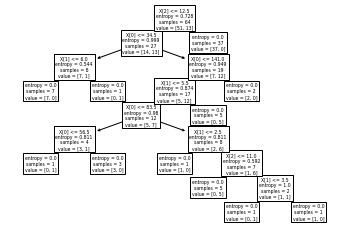

<Figure size 3240x864 with 0 Axes>

In [19]:
#Visualization of the Decision Tree
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
tree.plot_tree(dtree)
plt.figure(figsize=(45,12))
plt.show()

In [21]:
#KFOLD CV:
from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.84615385, 0.92307692, 0.84615385, 0.76923077, 0.75      ])

In [ ]:
# KFOLD=5
